In [4]:
%load gaussianKernel.m

In [26]:
%%writefile gaussianKernel.m
function sim = gaussianKernel(x1, x2, sigma)
%RBFKERNEL returns a radial basis function kernel between x1 and x2
%   sim = gaussianKernel(x1, x2) returns a gaussian kernel between x1 and x2
%   and returns the value in sim

% Ensure that x1 and x2 are column vectors
x1 = x1(:); x2 = x2(:);

% You need to return the following variables correctly.
sim = 0;

% ====================== YOUR CODE HERE ======================
% Instructions: Fill in this function to return the similarity between x1
%               and x2 computed using a Gaussian kernel with bandwidth
%               sigma
%
%

dif = x1 - x2;
sim = exp ( -1/2/sigma^2*dif'*dif );
% =============================================================
    
end


In [38]:
%save?

In [6]:
%load ex6.m

In [ ]:
%% Machine Learning Online Class
%  Exercise 6 | Support Vector Machines
%
%  Instructions
%  ------------
% 
%  This file contains code that helps you get started on the
%  exercise. You will need to complete the following functions:
%
%     gaussianKernel.m
%     dataset3Params.m
%     processEmail.m
%     emailFeatures.m
%
%  For this exercise, you will not need to change any code in this file,
%  or any other files other than those mentioned above.
%

%% Initialization
clear ; close all; clc

Loading and Visualizing Data ...
Program paused. Press enter to continue.
Paused, enter any value to continue


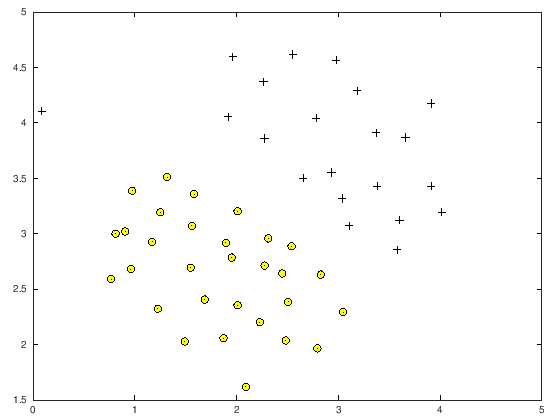

In [7]:
%% =============== Part 1: Loading and Visualizing Data ================
%  We start the exercise by first loading and visualizing the dataset. 
%  The following code will load the dataset into your environment and plot
%  the data.
%

fprintf('Loading and Visualizing Data ...\n')

% Load from ex6data1: 
% You will have X, y in your environment
load('ex6data1.mat');

% Plot training data
plotData(X, y);

fprintf('Program paused. Press enter to continue.\n');
pause;


Training Linear SVM ...

Training ............................................. Done! 

Program paused. Press enter to continue.
Paused, enter any value to continue


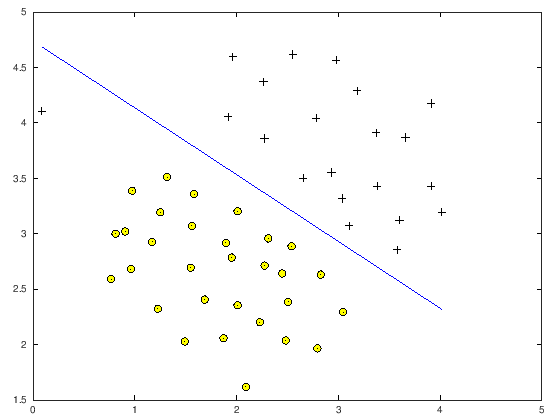

In [14]:
%% ==================== Part 2: Training Linear SVM ====================
%  The following code will train a linear SVM on the dataset and plot the
%  decision boundary learned.
%

% Load from ex6data1: 
% You will have X, y in your environment
load('ex6data1.mat');

fprintf('\nTraining Linear SVM ...\n')

% You should try to change the C value below and see how the decision
% boundary varies (e.g., try C = 1000)
C = 1;
model = svmTrain(X, y, C, @linearKernel, 1e-3, 20);
visualizeBoundaryLinear(X, y, model);

fprintf('Program paused. Press enter to continue.\n');
pause;

In [15]:
%% =============== Part 3: Implementing Gaussian Kernel ===============
%  You will now implement the Gaussian kernel to use
%  with the SVM. You should complete the code in gaussianKernel.m
%
fprintf('\nEvaluating the Gaussian Kernel ...\n')

x1 = [1 2 1]; x2 = [0 4 -1]; sigma = 2;
sim = gaussianKernel(x1, x2, sigma);

fprintf(['Gaussian Kernel between x1 = [1; 2; 1], x2 = [0; 4; -1], sigma = %f :' ...
         '\n\t%f\n(for sigma = 2, this value should be about 0.324652)\n'], sigma, sim);

fprintf('Program paused. Press enter to continue.\n');
pause;


Evaluating the Gaussian Kernel ...
Gaussian Kernel between x1 = [1; 2; 1], x2 = [0; 4; -1], sigma = 2.000000 :
	0.324652
(for sigma = 2, this value should be about 0.324652)
Program paused. Press enter to continue.
Paused, enter any value to continue


In [16]:
submit();

== Submitting solutions | Support Vector Machines...
Login (email address):m.keyran@gmail.com
Token:ccVP8afQqKl6ZiN5

==== Processed Email ====

the quick brown fox jump over the lazi dog 

== 
==                                   Part Name |     Score | Feedback
==                                   --------- |     ----- | --------
==                             Gaussian Kernel |  25 /  25 | Nice work!
==         Parameters (C, sigma) for Dataset 3 |   0 /  25 | 
==                         Email Preprocessing |   0 /  25 | 
==                    Email Feature Extraction |   0 /  25 | 
==                                   --------------------------------
==                                             |  25 / 100 | 
== 


Loading and Visualizing Data ...
Program paused. Press enter to continue.
Paused, enter any value to continue


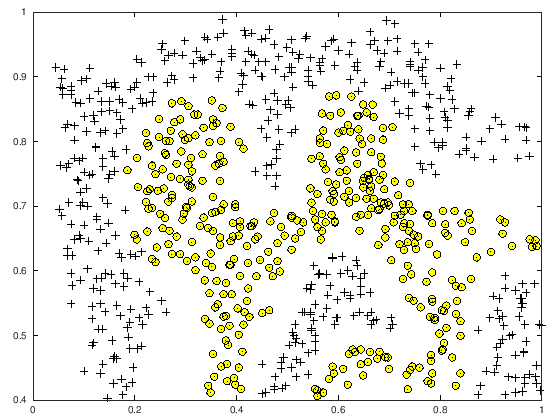

In [17]:
%% =============== Part 4: Visualizing Dataset 2 ================
%  The following code will load the next dataset into your environment and 
%  plot the data. 
%

fprintf('Loading and Visualizing Data ...\n')

% Load from ex6data2: 
% You will have X, y in your environment
load('ex6data2.mat');

% Plot training data
plotData(X, y);

fprintf('Program paused. Press enter to continue.\n');
pause;


Training SVM with RBF Kernel (this may take 1 to 2 minutes) ...

Training ......................................................................
...............................................................................
...............................................................................
...............................................................................
...............................................................................
...............................................................................
...............................................................................
....................................................... Done! 

Program paused. Press enter to continue.
Paused, enter any value to continue


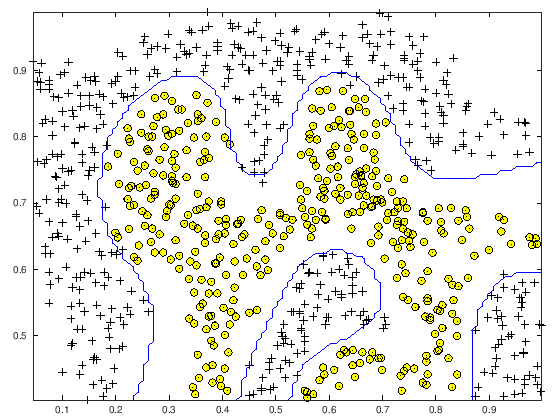

In [18]:
%% ========== Part 5: Training SVM with RBF Kernel (Dataset 2) ==========
%  After you have implemented the kernel, we can now use it to train the 
%  SVM classifier.
% 
fprintf('\nTraining SVM with RBF Kernel (this may take 1 to 2 minutes) ...\n');

% Load from ex6data2: 
% You will have X, y in your environment
load('ex6data2.mat');

% SVM Parameters
C = 1; sigma = 0.1;

% We set the tolerance and max_passes lower here so that the code will run
% faster. However, in practice, you will want to run the training to
% convergence.
model= svmTrain(X, y, C, @(x1, x2) gaussianKernel(x1, x2, sigma)); 
visualizeBoundary(X, y, model);

fprintf('Program paused. Press enter to continue.\n');
pause;

Loading and Visualizing Data ...
Program paused. Press enter to continue.
Paused, enter any value to continue


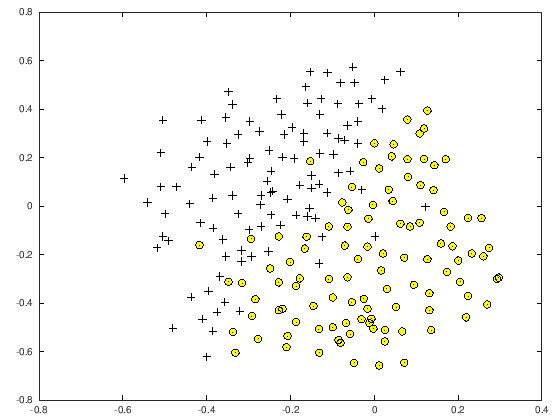

In [19]:
%% =============== Part 6: Visualizing Dataset 3 ================
%  The following code will load the next dataset into your environment and 
%  plot the data. 
%

fprintf('Loading and Visualizing Data ...\n')

% Load from ex6data3: 
% You will have X, y in your environment
load('ex6data3.mat');

% Plot training data
plotData(X, y);

fprintf('Program paused. Press enter to continue.\n');
pause;

In [20]:
%load dataset3Params.m

In [45]:
%%writefile dataset3Params.m
function [C, sigma] = bestParams(X, y, Xval, yval)
C = 1;
sigma = 0.3;

C_init = 0.01;
sigma_init = 0.01;

step = 3;
steps = 8;

C = C_init;

best_error = 1;
best_C = C_init;
best_sigma = sigma_init;

for cs = 1:steps
    sigma = sigma_init;
    for ss = 1:steps
        model= svmTrain(X, y, C, @(x1, x2) gaussianKernel(x1, x2, sigma));
        predicted = svmPredict(model, Xval);
        current_error = mean(double(predicted ~= yval));
        if (current_error < best_error) 
            best_error = current_error;
            best_C = C;
            best_sigma = sigma;
        end
        sigma *= step;
    end
    C *= step;
end 

C = best_C;
sigma = best_sigma;

end


In [50]:
%%writefile dataset3Params.m
function [C, sigma] = dataset3Params(X, y, Xval, yval)
%DATASET3PARAMS returns your choice of C and sigma for Part 3 of the exercise
%where you select the optimal (C, sigma) learning parameters to use for SVM
%with RBF kernel
%   [C, sigma] = DATASET3PARAMS(X, y, Xval, yval) returns your choice of C and 
%   sigma. You should complete this function to return the optimal C and 
%   sigma based on a cross-validation set.
%

% You need to return the following variables correctly.
C = 1;
sigma = 0.3;

% ====================== YOUR CODE HERE ======================
% Instructions: Fill in this function to return the optimal C and sigma
%               learning parameters found using the cross validation set.
%               You can use svmPredict to predict the labels on the cross
%               validation set. For example, 
%                   predictions = svmPredict(model, Xval);
%               will return the predictions on the cross validation set.
%
%  Note: You can compute the prediction error using 
%        mean(double(predictions ~= yval))
%

%[C, sigma] = bestParams(X, y, Xval, yval)
C = 0.37037;
sigma = 0.11111;
% =========================================================================

end



Training ......................................................................
...............................................................................
...............................................................................
................................................. Done! 

Program paused. Press enter to continue.
Paused, enter any value to continue


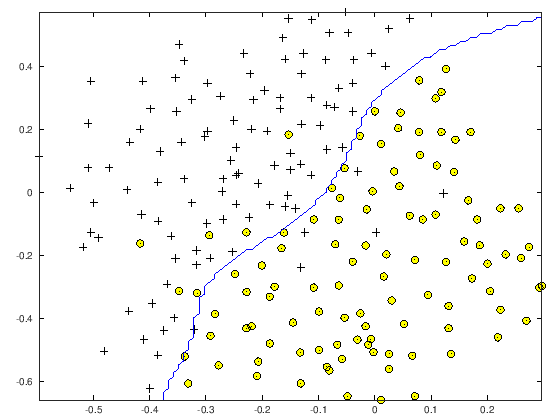

In [51]:
%% ========== Part 7: Training SVM with RBF Kernel (Dataset 3) ==========

%  This is a different dataset that you can use to experiment with. Try
%  different values of C and sigma here.
% 

% Load from ex6data3: 
% You will have X, y in your environment
load('ex6data3.mat');

% Try different SVM Parameters here
[C, sigma] = dataset3Params(X, y, Xval, yval);

% Train the SVM
model= svmTrain(X, y, C, @(x1, x2) gaussianKernel(x1, x2, sigma));
visualizeBoundary(X, y, model);

fprintf('Program paused. Press enter to continue.\n');
pause;

In [52]:
submit();

== Submitting solutions | Support Vector Machines...
Use token from last successful submission (m.keyran@gmail.com)? (Y/n):

==== Processed Email ====

the quick brown fox jump over the lazi dog 

== 
==                                   Part Name |     Score | Feedback
==                                   --------- |     ----- | --------
==                             Gaussian Kernel |  25 /  25 | Nice work!
==         Parameters (C, sigma) for Dataset 3 |  25 /  25 | Nice work!
==                         Email Preprocessing |   0 /  25 | 
==                    Email Feature Extraction |   0 /  25 | 
==                                   --------------------------------
==                                             |  50 / 100 | 
== 


In [47]:
sigma

sigma =  0.11111


In [53]:
%load ex6_spam.m

In [ ]:
%% Machine Learning Online Class
%  Exercise 6 | Spam Classification with SVMs
%
%  Instructions
%  ------------
% 
%  This file contains code that helps you get started on the
%  exercise. You will need to complete the following functions:
%
%     gaussianKernel.m
%     dataset3Params.m
%     processEmail.m
%     emailFeatures.m
%
%  For this exercise, you will not need to change any code in this file,
%  or any other files other than those mentioned above.
%

%% Initialization
clear ; close all; clc

In [9]:
%% ==================== Part 1: Email Preprocessing ====================
%  To use an SVM to classify emails into Spam v.s. Non-Spam, you first need
%  to convert each email into a vector of features. In this part, you will
%  implement the preprocessing steps for each email. You should
%  complete the code in processEmail.m to produce a word indices vector
%  for a given email.

fprintf('\nPreprocessing sample email (emailSample1.txt)\n');

% Extract Features
file_contents = readFile('emailSample1.txt');
word_indices  = processEmail(file_contents);

% Print Stats
fprintf('Word Indices: \n');
fprintf(' %d', word_indices);
fprintf('\n\n');

fprintf('Program paused. Press enter to continue.\n');
pause;


Preprocessing sample email (emailSample1.txt)

==== Processed Email ====

anyon know how much it cost to host a web portal well it depend on how mani 
visitor you re expect thi can be anywher from less than number buck a month 
to a coupl of dollarnumb you should checkout httpaddr or perhap amazon ecnumb 
if your run someth big to unsubscrib yourself from thi mail list send an 
email to emailaddr 

Word Indices: 
 86 916 794 1077 883 370 1699 790 1822 1831 883 431 1171 794 1002 1893 1364 592 1676 238 162 89 688 945 1663 1120 1062 1699 375 1162 479 1893 1510 799 1182 1237 810 1895 1440 1547 181 1699 1758 1896 688 1676 992 961 1477 71 530 1699 531


Program paused. Press enter to continue.
Paused, enter any value to continue
 86 916 794 1077 883 370 1699 790 1822 1831 883 431 1171 794 1002 1893 1364 592 1676 238 162 89 688 945 1663 1120 1062 1699 375 1162 479 1893 1510 799 1182 1237 810 1895 1440 1547 181 1699 1758 1896 688 1676 992 961 1477 71 530 1699 531


In [34]:
%% ==================== Part 2: Feature Extraction ====================
%  Now, you will convert each email into a vector of features in R^n. 
%  You should complete the code in emailFeatures.m to produce a feature
%  vector for a given email.

fprintf('\nExtracting features from sample email (emailSample1.txt)\n');

% Extract Features
file_contents = readFile('emailSample1.txt');
word_indices  = processEmail(file_contents);
features      = emailFeatures(word_indices);

% Print Stats
fprintf('Length of feature vector: %d\n', length(features));
fprintf('Number of non-zero entries: %d\n', sum(features > 0));

fprintf('Program paused. Press enter to continue.\n');
pause;


Extracting features from sample email (emailSample1.txt)

==== Processed Email ====

anyon know how much it cost to host a web portal well it depend on how mani 
visitor you re expect thi can be anywher from less than number buck a month 
to a coupl of dollarnumb you should checkout httpaddr or perhap amazon ecnumb 
if your run someth big to unsubscrib yourself from thi mail list send an 
email to emailaddr 

Length of feature vector: 1899
Number of non-zero entries: 45
Program paused. Press enter to continue.
Paused, enter any value to continue


In [ ]:
%% =========== Part 3: Train Linear SVM for Spam Classification ========
%  In this section, you will train a linear classifier to determine if an
%  email is Spam or Not-Spam.

% Load the Spam Email dataset
% You will have X, y in your environment
load('spamTrain.mat');

fprintf('\nTraining Linear SVM (Spam Classification)\n')
fprintf('(this may take 1 to 2 minutes) ...\n')

C = 0.1;
model = svmTrain(X, y, C, @linearKernel);

p = svmPredict(model, X);

fprintf('Training Accuracy: %f\n', mean(double(p == y)) * 100);

In [ ]:
%% =================== Part 4: Test Spam Classification ================
%  After training the classifier, we can evaluate it on a test set. We have
%  included a test set in spamTest.mat

% Load the test dataset
% You will have Xtest, ytest in your environment
load('spamTest.mat');

fprintf('\nEvaluating the trained Linear SVM on a test set ...\n')

p = svmPredict(model, Xtest);

fprintf('Test Accuracy: %f\n', mean(double(p == ytest)) * 100);
pause;

In [ ]:
%% ================= Part 5: Top Predictors of Spam ====================
%  Since the model we are training is a linear SVM, we can inspect the
%  weights learned by the model to understand better how it is determining
%  whether an email is spam or not. The following code finds the words with
%  the highest weights in the classifier. Informally, the classifier
%  'thinks' that these words are the most likely indicators of spam.
%

% Sort the weights and obtin the vocabulary list
[weight, idx] = sort(model.w, 'descend');
vocabList = getVocabList();

fprintf('\nTop predictors of spam: \n');
for i = 1:15
    fprintf(' %-15s (%f) \n', vocabList{idx(i)}, weight(i));
end

fprintf('\n\n');
fprintf('\nProgram paused. Press enter to continue.\n');
pause;

In [ ]:
%% =================== Part 6: Try Your Own Emails =====================
%  Now that you've trained the spam classifier, you can use it on your own
%  emails! In the starter code, we have included spamSample1.txt,
%  spamSample2.txt, emailSample1.txt and emailSample2.txt as examples. 
%  The following code reads in one of these emails and then uses your 
%  learned SVM classifier to determine whether the email is Spam or 
%  Not Spam

% Set the file to be read in (change this to spamSample2.txt,
% emailSample1.txt or emailSample2.txt to see different predictions on
% different emails types). Try your own emails as well!
filename = 'spamSample1.txt';

% Read and predict
file_contents = readFile(filename);
word_indices  = processEmail(file_contents);
x             = emailFeatures(word_indices);
p = svmPredict(model, x);

fprintf('\nProcessed %s\n\nSpam Classification: %d\n', filename, p);
fprintf('(1 indicates spam, 0 indicates not spam)\n\n');

In [2]:
%load processEmail.m

In [8]:
function word_indices = processEmail(email_contents)
%PROCESSEMAIL preprocesses a the body of an email and
%returns a list of word_indices 
%   word_indices = PROCESSEMAIL(email_contents) preprocesses 
%   the body of an email and returns a list of indices of the 
%   words contained in the email. 
%

% Load Vocabulary
vocabList = getVocabList();

% Init return value
word_indices = [];

% ========================== Preprocess Email ===========================

% Find the Headers ( \n\n and remove )
% Uncomment the following lines if you are working with raw emails with the
% full headers

% hdrstart = strfind(email_contents, ([char(10) char(10)]));
% email_contents = email_contents(hdrstart(1):end);

% Lower case
email_contents = lower(email_contents);

% Strip all HTML
% Looks for any expression that starts with < and ends with > and replace
% and does not have any < or > in the tag it with a space
email_contents = regexprep(email_contents, '<[^<>]+>', ' ');

% Handle Numbers
% Look for one or more characters between 0-9
email_contents = regexprep(email_contents, '[0-9]+', 'number');

% Handle URLS
% Look for strings starting with http:// or https://
email_contents = regexprep(email_contents, ...
                           '(http|https)://[^\s]*', 'httpaddr');

% Handle Email Addresses
% Look for strings with @ in the middle
email_contents = regexprep(email_contents, '[^\s]+@[^\s]+', 'emailaddr');

% Handle $ sign
email_contents = regexprep(email_contents, '[$]+', 'dollar');


% ========================== Tokenize Email ===========================

% Output the email to screen as well
fprintf('\n==== Processed Email ====\n\n');

% Process file
l = 0;

while ~isempty(email_contents)

    % Tokenize and also get rid of any punctuation
    [str, email_contents] = ...
       strtok(email_contents, ...
              [' @$/#.-:&*+=[]?!(){},''">_<;%' char(10) char(13)]);
   
    % Remove any non alphanumeric characters
    str = regexprep(str, '[^a-zA-Z0-9]', '');

    % Stem the word 
    % (the porterStemmer sometimes has issues, so we use a try catch block)
    try str = porterStemmer(strtrim(str)); 
    catch str = ''; continue;
    end;

    % Skip the word if it is too short
    if length(str) < 1
       continue;
    end

    % Look up the word in the dictionary and add to word_indices if
    % found
    % ====================== YOUR CODE HERE ======================
    % Instructions: Fill in this function to add the index of str to
    %               word_indices if it is in the vocabulary. At this point
    %               of the code, you have a stemmed word from the email in
    %               the variable str. You should look up str in the
    %               vocabulary list (vocabList). If a match exists, you
    %               should add the index of the word to the word_indices
    %               vector. Concretely, if str = 'action', then you should
    %               look up the vocabulary list to find where in vocabList
    %               'action' appears. For example, if vocabList{18} =
    %               'action', then, you should add 18 to the word_indices 
    %               vector (e.g., word_indices = [word_indices ; 18]; ).
    % 
    % Note: vocabList{idx} returns a the word with index idx in the
    %       vocabulary list.
    % 
    % Note: You can use strcmp(str1, str2) to compare two strings (str1 and
    %       str2). It will return 1 only if the two strings are equivalent.
    %

    pos = find (cellfun(@(x) strcmp(x,str),vocabList));
    if (pos)
        word_indices = [word_indices; pos];
    end
    
    % =============================================================


    % Print to screen, ensuring that the output lines are not too long
    if (l + length(str) + 1) > 78
        fprintf('\n');
        l = 0;
    end
    fprintf('%s ', str);
    l = l + length(str) + 1;

end
% Print footer
fprintf('\n\n=========================\n');

end


In [10]:
%load emailFeatures.m

In [33]:
function x = emailFeatures(word_indices)
%EMAILFEATURES takes in a word_indices vector and produces a feature vector
%from the word indices
%   x = EMAILFEATURES(word_indices) takes in a word_indices vector and 
%   produces a feature vector from the word indices. 

% Total number of words in the dictionary
n = 1899;

% You need to return the following variables correctly.
x = zeros(n, 1);

% ====================== YOUR CODE HERE ======================
% Instructions: Fill in this function to return a feature vector for the
%               given email (word_indices). To help make it easier to 
%               process the emails, we have have already pre-processed each
%               email and converted each word in the email into an index in
%               a fixed dictionary (of 1899 words). The variable
%               word_indices contains the list of indices of the words
%               which occur in one email.
% 
%               Concretely, if an email has the text:
%
%                  The quick brown fox jumped over the lazy dog.
%
%               Then, the word_indices vector for this text might look 
%               like:
%               
%                   60  100   33   44   10     53  60  58   5
%
%               where, we have mapped each word onto a number, for example:
%
%                   the   -- 60
%                   quick -- 100
%                   ...
%
%              (note: the above numbers are just an example and are not the
%               actual mappings).
%
%              Your task is take one such word_indices vector and construct
%              a binary feature vector that indicates whether a particular
%              word occurs in the email. That is, x(i) = 1 when word i
%              is present in the email. Concretely, if the word 'the' (say,
%              index 60) appears in the email, then x(60) = 1. The feature
%              vector should look like:
%
%              x = [ 0 0 0 0 1 0 0 0 ... 0 0 0 0 1 ... 0 0 0 1 0 ..];
%
%


x(word_indices) = 1;

% =========================================================================
    

end


In [32]:
n = 1899;


a =

   0
   0
   0
   0
   0
   0
   0
   0
   0
   0
   0
   0
   0
   0
   0
   0
   0
   0
   0
   0
   0
   0
   0
   0
   0
   0
   0
   0
   0
   0
   0
   0
   0
   0
   0
   0
   0
   0
   0
   0
   0
   0
   0
   0
   0
   0
   0
   0
   0
   0
   0
   0
   0
   0
   0
   0
   0
   0
   0
   0
   0
   0
   0
   0
   0
   0
   0
   0
   0
   0
   1
   0
   0
   0
   0
   0
   0
   0
   0
   0
   0
   0
   0
   0
   0
   1
   0
   0
   1
   0
   0
   0
   0
   0
   0
   0
   0
   0
   0
   0
   0
   0
   0
   0
   0
   0
   0
   0
   0
   0
   0
   0
   0
   0
   0
   0
   0
   0
   0
   0
   0
   0
   0
   0
   0
   0
   0
   0
   0
   0
   0
   0
   0
   0
   0
   0
   0
   0
   0
   0
   0
   0
   0
   0
   0
   0
   0
   0
   0
   0
   0
   0
   0
   0
   0
   0
   0
   0
   0
   0
   0
   1
   0
   0
   0
   0
   0
   0
   0
   0
   0
   0
   0
   0
   0
   0
   0
   0
   0
   0
   1
   0
   0
   0
   0
   0
   0
   0
   0
   0
   0
   0
   0
   0
   0
   0
   0
   0
   0


   0
   0
   0
   0
   0
   0
   0
   0
   0
   0
   0
   0
   0
   0
   0
   0
   0
   0
   0
   0
   0
   0
   0
   0
   1
   0
   0
   0
   0
   0
   0
   0
   0
   0
   0
   0
   0
   1
   0
   0
   0
   0
   0
   0
   0
   0
   0
   0
   0
   0
   0
   0
   0
   0
   0
   0
   0
   0
   0
   0
   1
   0
   0
   0
   0
   0
   0
   0
   0
   0
   0
   0
   0
   0
   0
   0
   0
   0
   0
   0
   0
   0
   0
   0
   0
   0
   0
   0
   0
   0
   0
   0
   0
   0
   0
   0
   0
   0
   0
   0
   0
   0
   0
   0
   0
   0
   0
   0
   0
   0
   0
   0
   0
   0
   0
   0
   0
   0
   0
   1
   0
   0
   0
   0
   0
   0
   0
   0
   0
   0
   0
   0
   0
   0
   0
   0
   0
   0
   0
   0
   0
   0
   0
   0
   0
   0
   0
   0
   0
   0
   0
   0
   0
   0
   0
   0
   0
   0
   0
   0
   0
   0
   0
   0
   0
   0
   0
   0
   0
   0
   0
   0
   0
   0
   0
   0
   0
   0
   0
   0
   0
   0
   0
   1
   0
   0
   0
   0
   0
   0
   0
   0
   1
   0
   0
   0
   0
   0
   0
   0


In [21]:
disp(n);

 1899


In [25]:
ones(10,1)

ans =

   1
   1
   1
   1
   1
   1
   1
   1
   1
   1



In [35]:
submit();

== Submitting solutions | Support Vector Machines...
Use token from last successful submission (m.keyran@gmail.com)? (Y/n):

==== Processed Email ====

the quick brown fox jump over the lazi dog 

== 
==                                   Part Name |     Score | Feedback
==                                   --------- |     ----- | --------
==                             Gaussian Kernel |  25 /  25 | Nice work!
==         Parameters (C, sigma) for Dataset 3 |  25 /  25 | Nice work!
==                         Email Preprocessing |  25 /  25 | Nice work!
==                    Email Feature Extraction |  25 /  25 | Nice work!
==                                   --------------------------------
==                                             | 100 / 100 | 
== 
